In [2]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt

# 3.1 비지도 학습의 종류

- 비지도 변환: 데이터를 새롭게 표현하여 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘. 차원축소 방법을 널리 사용하며 시각화를 위해 2차원으로 변경하는 것이 한 예시다. 데이터를 구성하는 단위나 성분을 찾기도함.

- 군집: 데이터를 비슷한 것끼리 그룹으로 묶는 것. 같은 사람이 찍힌 사진들을 그룹으로 묶는 것이 예가 될 수 있음.

# 3.2 비지도 학습의 도전 과제

**비지도 학습에서 가장 어려운 것은 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것이다. 대부분 직접 확인하는 것이 유일한 방법일 때가 많다. 그래서 비지도 학습 알고리즘은 '데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계' 또는 '지도 학습의 전처리 단계'에서 많이 사용한다.**

# 3.3 데이터 전처리와 스케일 조정
**데이터셋의 스케일을 조정하거나 전처리하는 여러 방법**

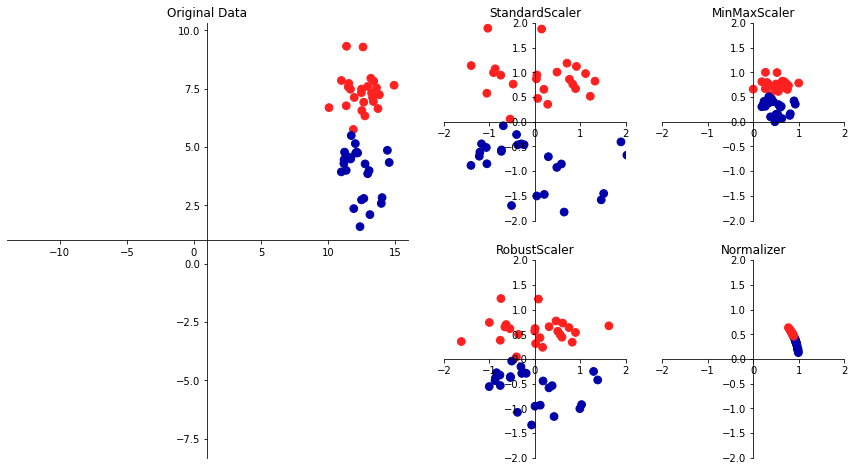

In [3]:
mglearn.plots.plot_scaling()

## 3.3.1 여러가지 전처리 방법
> 첫 번째 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋

  - StandardScaler: 
    각 특성의 평균을 0, 분산을 1로 변경해 모든 특성이 같은 크기를 가지게 하지만 특성의 최솟값과 최댓값 크기를 제한하지는 않음.
  
  - MinMaxScaler: 모든 특성이 정확히 0과 1사이에 위치하도록 데이터를 변경하며 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y 축의 0과 1 사이의 사각 영역에 담기게 됨.
  
  - RobustScaler: StandardScaler처럼 특성들이 같은 스케일을 갖게 된다는 점은 비슷하나 중간 값과 사분위 값을 사용하기에 이상치에 영향을 받지 않는다.
  
  - Normalizer: 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 특성 벡터의 길이는 상관 없고 데이터의 방향(각도)만이 중요할 때 많이 사용한다.
  
## 3.3.2 데이터 변환 적용하기

아래는 cancer 데이터셋, 커널 SVM(SVC), 데이터 전처리: MinMaxScaler을 사용

In [4]:
#데이터 적재 후 스플릿 적용
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
#전처리 fit 해보기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

훈련 데이터의 스케일 조정을 위해 scaler 객체의 transform 메서드 적용

In [6]:
#데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성 출력
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


특성 값이 이동되거나 크기가 조정되었을 뿐 변환된 데이터의 배열 크기는 원래 데이터와 동일하다.

SVM에 정용하려면 데스트 세트도 변환해야 해서 아래와 같이 진행한다.

In [7]:
# 테스트 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력하기
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


신기하게도 스케일을 조정한 테스트 세트의 최솟값과 최댓값이 0과 1 사이가 아니다.
모든 스케일 모델은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다. transform 메서드는 항상 훈련 세트를 기준으로 전처리를 진행한다.

## 3.3.4 

위에서 알아본 것 처럼 지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야한다. 아래 예는 이와 반대로 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 보여준다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

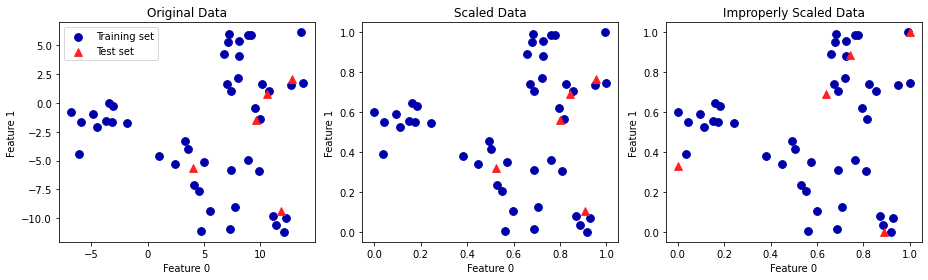

In [8]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그린다.
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler를 사용해 스케일을 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도 그리기
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1이 된다.
# 이는 얘제를 위한 것으로, 절대로 이렇게 사용하면 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도 그리기
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

첫 번째 그래프는 원본, 두 번째는 MinMaxScaler로 스케일 조정한 것이며 전 장에서 알아본 것 과 같이 테스트 데이터셋의 최댓값과 최솟값이 0과 1 사이가 아니다.
세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정한 것인데 정말 뒤죽박죽되었다.

또한 아래와 같이 fit과 transform을 차례로 호출하는 것 대신 단축 메서드를 사용하면 좋다.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝을 사용하여 fit과 transformd을 연달아 호출한다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적이다
X_scaled_d = scaler.fit_transform(X_train)


## 3.3.5 지도 학습에서 데이터 전처리 효과

cancer 데이터셋에 대해 SVC를 학습시킬 때 MinMaxScaler의 효과를 확인해보겠다.
먼저 원본 데이터로 SVC 모델을 만든다.

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [11]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


결과의 차이를 보면 전처리의 효과가 꽤나 큰 것을 알 수 있다.

아래와 같이 파이썬 클래스만 바꾸면 다른 전처리 알고리즘으로 손쉽게 교체할 수 있다.

In [12]:
# 평균 0, 분산 1을 갖도록 스케일 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# 3.4 차원 축소, 특성 추출, 매니폴드 학습

**비지도 학습을 사용해 데이터를 변화하는 일반적인 동기는 시각화, 데이터 압축, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위한 것들이다. 이번 절에서는 주성분 분석, 특성 추출에 널리 사용하는 비음수 행렬 분해와 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE 알고리즘도 살펴보겠다.**

## 3.4.1 주성분 분석(PCA)
 **주성분 분석읔 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다.**
 
 다음 예제는 인위적으로 만든 2차원 데이터셋을 사용해 PCA 효과를 나타낸 것이다.

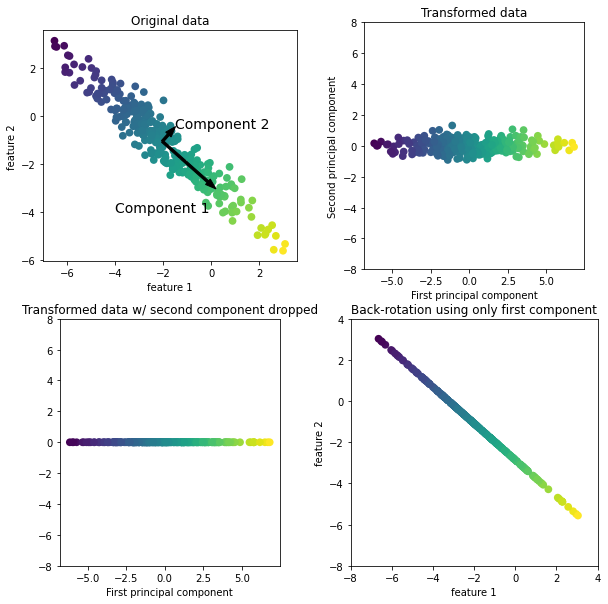

In [13]:
mglearn.plots.plot_pca_illustration()

1. 분산이 가장 큰 방향을 찾는데 이 방향이 데이터에서 가장 많은정보를 담고 있는 방향이다. 또한 '성분 1'과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는데 이게 '성분 2'이다. 이 과정을 거쳐 찾은 방향을 주된 분산의 방향, 즉 '주성분'이라고 한다. 일반적으로 원본 특성의 개수만큼 존재한다.

2. 주성분 1과 2를 x, y 축에 나란하도록 회전(조정)한 것이다. 데이터에서 평균을 빼서 중심을 원점에 맞춘다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 된다.

3. PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용 가능하다. 첫 번째 주성분만 유지하려 하는데 이렇게 하면 2차원 -> 1차원으로 차원이 감소한다. 1번 그래프에서 가장 유용한 방향, 즉 주성분 1을 유지하기 때문에 단순히 특성 하나만을 남기는 것과는 다르다.

4. 데이터에 평균을 더하고 반대로 회전시킨다. 이러면 원래의 특성 공간에 놓여있지만 첫 번째 주성분의 정보만을 담고 있기에 의미가 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는 데 종종 사용한다.


### PCA를 적용해 유방암 데이터셋 시각화하기

고차원 데이터셋을 시각화 할때는 PCA를 적용하면 된다.

아래는 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것이다.

'파랑: 음성, 초록: 양성'이며 겹쳐져있지 않을 수록 샘플을 구분하는 데 더 좋은 것인걸 추론할 수 있다. 

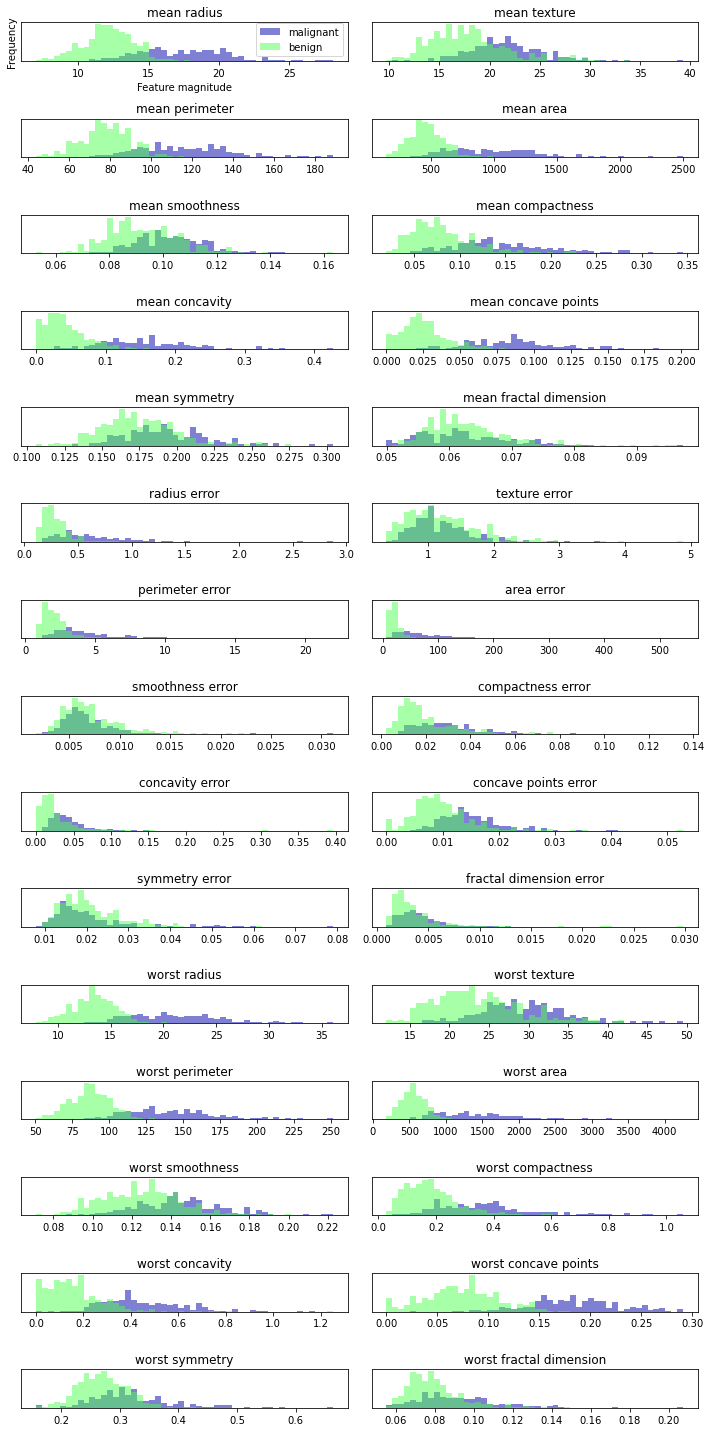

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

하지만 특성 간의 상호작용이나 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다.PCA를 사용하면 주요 상호작용을 찾아낼 수 있다. 아래는 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화하는 것이다.

PCA 적용 전 StandardScaler를 통한 전처리

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시키기
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만들기
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0.5, 0, 'First principal component')

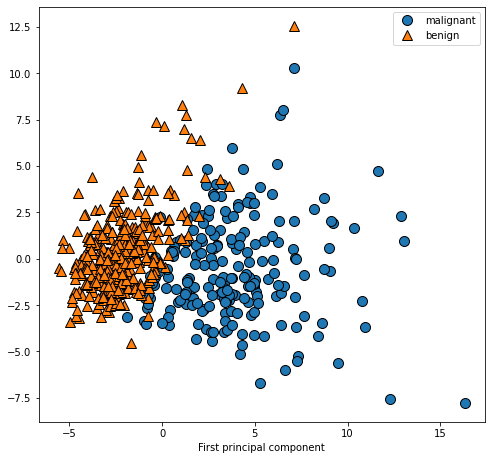

In [17]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타낸다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
 

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 이용하지 않는다. 단순히 데이터간의 상관관계를 고려하고 두 클래스는 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있다. 선형 분류기로도 잘 구분할 수 있을 것 같으며 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 볼 수 있다.

PCA의 주성분은 원본 데이터에있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이기 때문에 그래프의 두 축을 해석하기가 쉽지 않다는게 단점이다.

참고로 components_ 속성에 주성분이 저장되는데 아래와 같다.

In [18]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


각 행은 주성분 하나씩을 나타내면 중요도에 따라 정렬되어 있다. 열은 원본 데이터의 특성에 대응하는 값이다.

In [19]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


이 값들을 히트맵으로 시각화 하면 아래와 같다.
첫 번째 주성분은 모두 부호가 같으므로 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다.

두 번째 주성분은 부호가 섞여있고 두 주성분 모두 30개의 특성이 있다. 결론적으로 모든 특성이 섞여 있기에 축이 가지는 의미는 설명하기가 쉽지 않다.

Text(0, 0.5, 'Principal components')

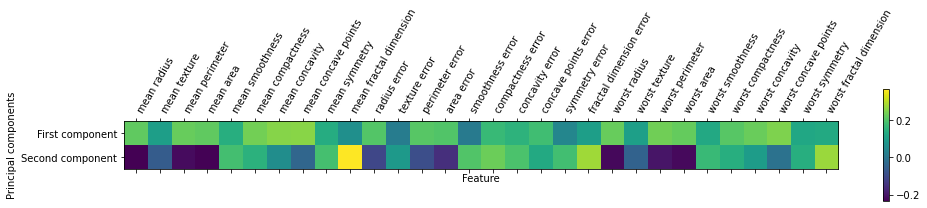

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 고유얼굴(eigenface) 특성 추출

PCA는 특성 추출에도 이용하는데 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발한다. 아래는 PCA를 이용하여 LFW(Laveled Faces in the wild) 데이터셋의 얼굴 이미지에서 특성을 추출하는 간단한 애플리케이션을 만드는 것이다.

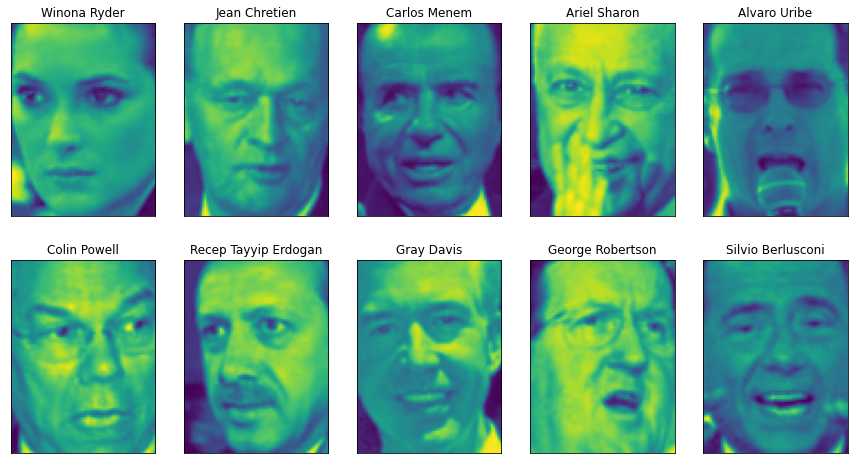

In [21]:
# 데이터셋 임포트 후 이미지 샘플 확인
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

3023 이미지 개수, 87*65 픽셀

In [22]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [23]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

위를 보니 조지 부시와 콜린 파월의 이미지가 편중되어 있어서 사람마다 50개의 이미지만 선택하는 코딩을 짠다.

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 픅백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같다.
X_people = X_people / 255.

1-최근접 이웃 분류기를 사용해서 분류를 시도했지만 정확도가 매우 낮다.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터셋 스플릿
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KneighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


픽셀을 사용해서 두 이미지를 비교할 때 각 픽셀의 톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교한다. 그러기에 얼굴 위치가 한 픽셀만 이동하여도 큰 차이가 나는 상황이 일어나서 정확도가 낮은 편이다. 그래서 주성분을 사용하며 정확도가 높아지지 않을까 하기에 아래에선 PCA 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정한다.

아래는 화이트닝 옵션으로 데이터가 회전하는 것뿐만 아니라스케일도 조정되어 그래프가 원 모양이 되었다.

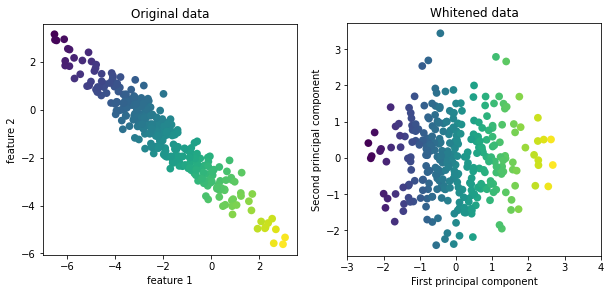

In [26]:
mglearn.plots.plot_pca_whitening()

PCA 객체를 훈련 데이터로 학습 시켜 100개의 주성분을 추출한 후 데이터를 변환한다.

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


PCA를 이용하여 정확도가 크게 향상되었다. 이미지 데이터인 경우 계산한 주성분을 쉽게 시각화 할 수 있는데 아래와 같다.

pca.components_.shape: (100, 5655)


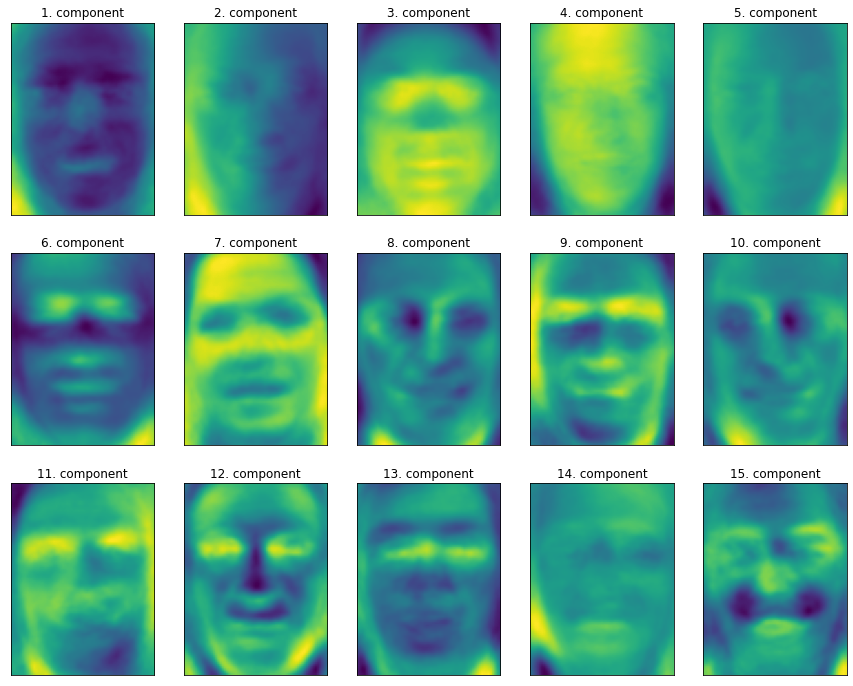

In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

주성분들을 완전히 이해할 순 없다. 대략적으로 얼굴의 배치와 조명이 이미지 정도가 영향이 있는 것 같다. 픽셀을 사용하기에 인간의 방식과는 다르다.

194쪽처럼 얼굴 데이터를 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있다. 원래 특성 공간으로 되돌리는 작업은 invers_transform 메서드를 사용한다. 아래는 주성분 개수에 따른 얼굴 이미지 재구성이다

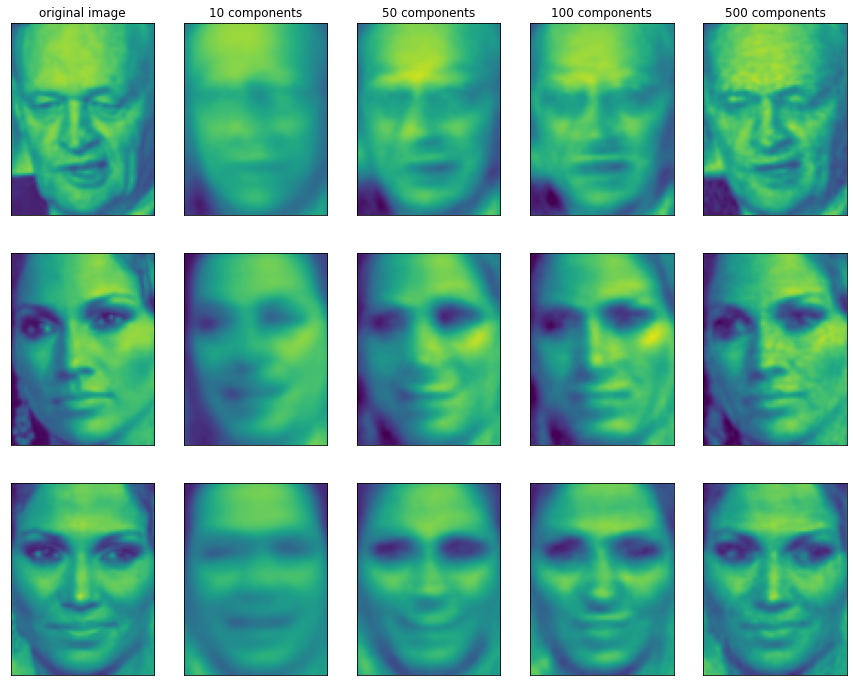

In [30]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

아래는 PCA의 처음 두 개의 주성분을 이용해 만든 얼굴 데이터셋의 산점도이다.

위처럼 주성분 10개를 사용해도 대략적인 특징만 보인 것처럼 2개의 주성분을 사용하였기에 클래스 구분이 명확하지 않는 모습을 볼 수 있다.

Text(0, 0.5, 'Second principal component')

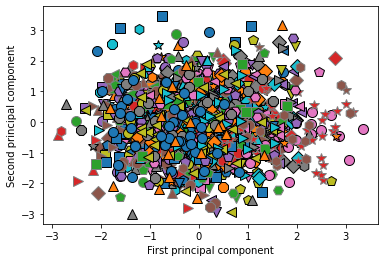

In [31]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 2.4.2 비음수 행렬 분해(NMF)

이것 또한 유용한 특성을 뽑아내기 위한 알고리즘이다. PCA와 비슷하며 차원 축소에도 사용할 수 있다. 가중치의 합으로 각 데이터 포인터를 표현할 수 있지만 PCA와는 다르게 음수가 아닌 성분과 계수 값을 찾는다. 그래서 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.

여러 독립적인 소스를 덮어써서 만들어진 데이터에 유용하며 섞여있는 곳에서 원본을 구분할 수 있다.

### 인위적 데이터에 NMF 적용하기

NMF를 사용하려면 주어진 데이터가 양수인지 확인해야한다. 다시 말하면 원점과의 관계가 중요하다는 뜻이다.

아래는 선분 개수에 따른 NMF이며 모든 성분을 동등하게 취급한다. 만약 성분이 특성 개수만큼 많다면 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택할 것이다. 큰 데이터 셋에 적용한다면 난수 생성 초깃값은 큰 영향을 준다.

/Users/eungibae/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/eungibae/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


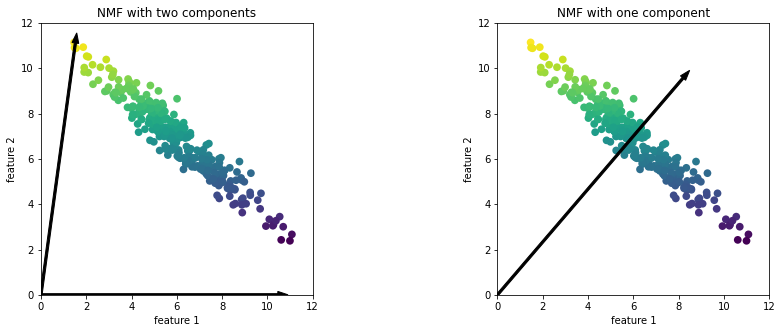

In [32]:
mglearn.plots.plot_nmf_illustration()

### 얼굴 이미지에 NMF 적용하기

LFW 데이터셋에 NMF를 적용해보겠다. NMF의 핵심 매개변수를 추출할 성분의 개수이다. 보통 이 값은 특성의 개수보다 작은데 픽셀 하나가 두 개의 성분으로 나뉘어 표현될 수 있기 때문이다. 아래는 성분 개수에 따른 변화를 살펴보겠다.

PCA는 재구성 측면에서 최선의 방향을 찾기 때문에 NMF는 비교적 품질이 떨어진다.

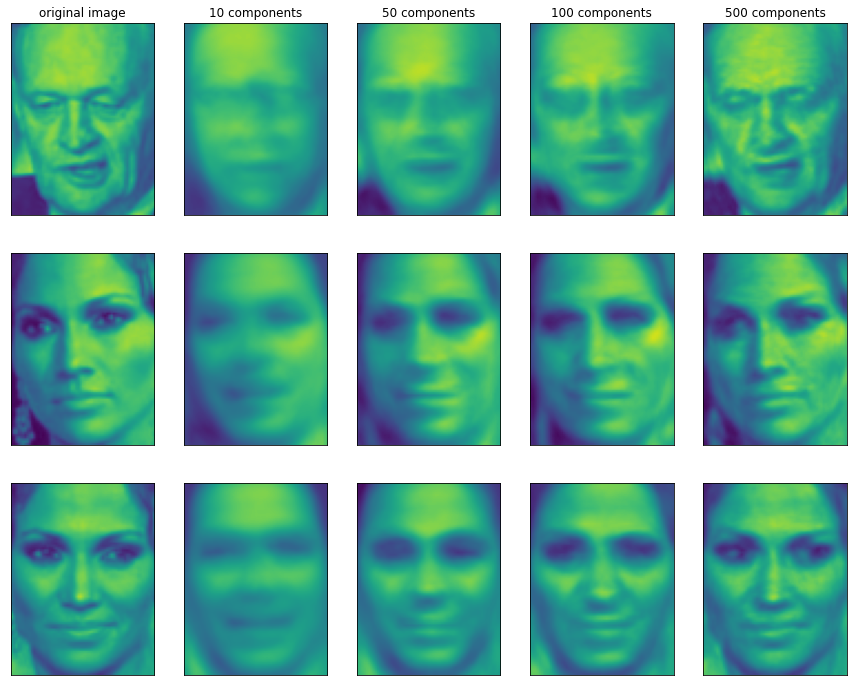

In [33]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

NMF는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용한다. 먼저 15개의 성분만 추출해보겠다.

/Users/eungibae/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


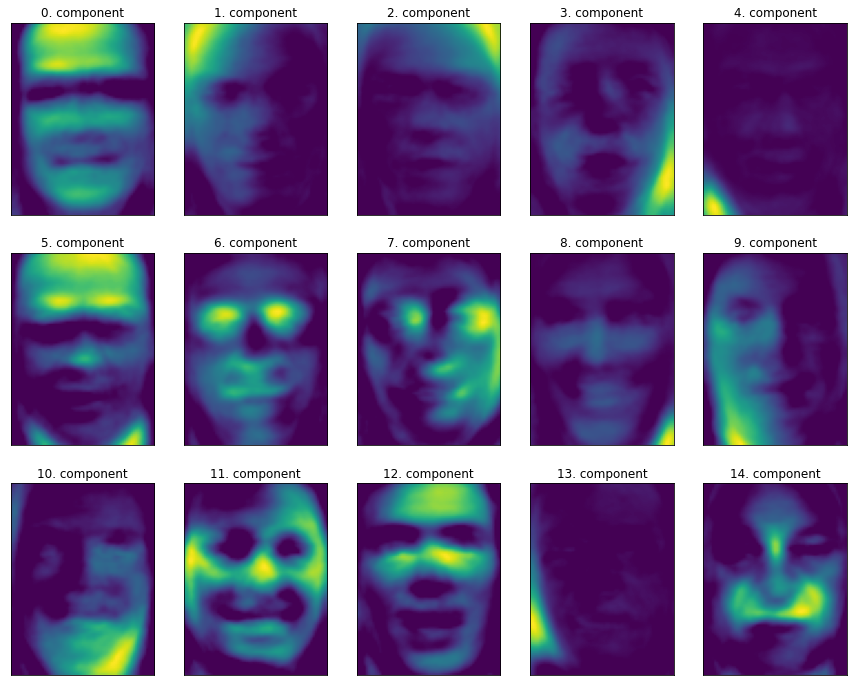

In [34]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

성분 3은 오른쪽, 7은 왼쪽으로 회전한 얼굴로 보인다.

아래는 성분 3과 7의 계수 값이 각각 큰 이미지들을 출력한 것인데 예측한 것과 같다. 이처럼 패턴을 추출하는 것에 유리하며 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터의 적합하다.

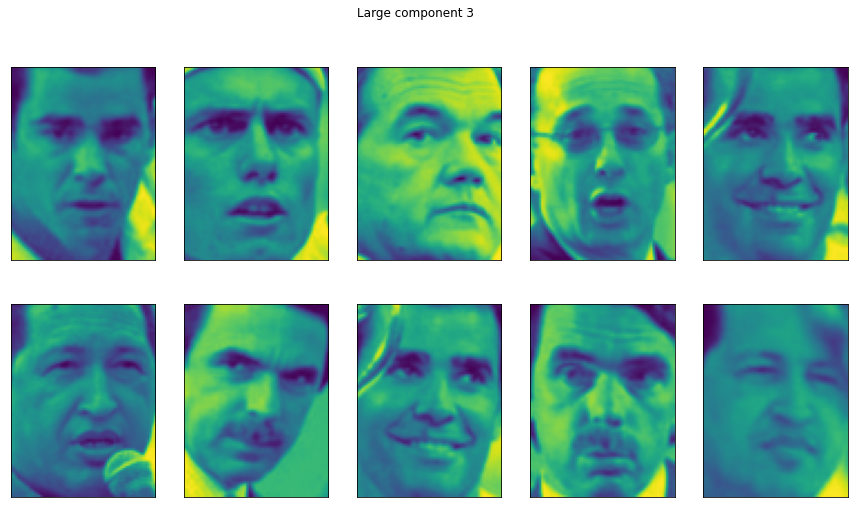

In [35]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

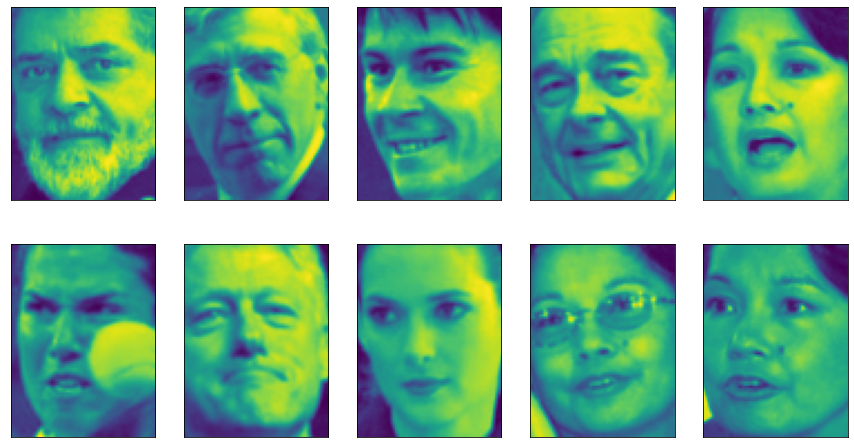

In [36]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

아래는 세 개의 서로 다른 입력으로부터 합성된 신호이다. 이걸 분해해서 원본 신호를 복원할 것이다. 이 신호를 여러 방법으로 관찰할 수 있고 각 장치는 일련의 측정 데이터를 제공한다고 가정하자.

Text(0, 0.5, 'Signal')

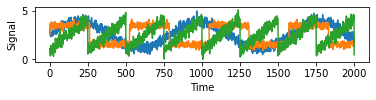

In [37]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [38]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


**NFM을 사용해 세 개의 신호를 복원한다**

In [39]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


/Users/eungibae/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


**비교를 위해 PCA도 적용**

In [40]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

**NMF와 PCA로 찾은 신호를 나타낸다**

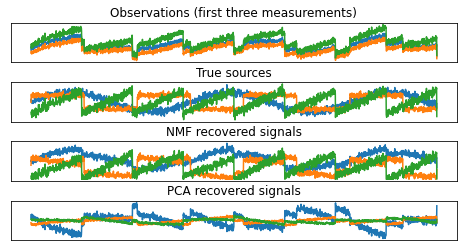

In [41]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

NMF는 잘 복원했지만 생성한 성분은 순서가 없다. 반대로 PCA는 순서는 있지만 실패했다.


PCA는 회전하고 방향을 제거하는 것 때문에 시각화가 유영성이 떨어진다. 매니폴드 학습 알고리즘이라는 시각화 알고리즘들은 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특히 t-SNE를 많이 이용한다.

## 3.4.3 t-SNE를 이용한 매니폴드 학습

단지 시각화를 목적으로 하기에 3개 이상의 특성을 뽑는 경우는 없고 새로운 데이터에 적용하진 못한다. 그래서 탐색적 데이터 분석에 유용하지 지도 학습에는 거의 사용 X. 

데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 아이디어이며 이웃 데이터 포인트에 대한 정보를 보존하려 노력한다.


아래는 손글씨 숫자 데이터셋(0~9, 8*8 크기 흑백 이미지)에 t-SNE를 적용.

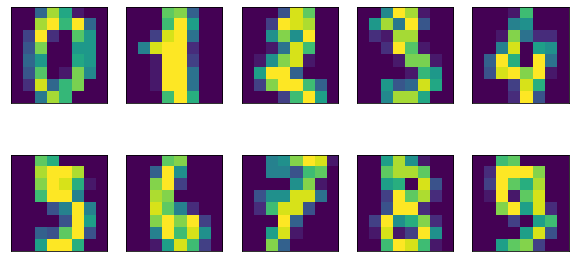

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

PCA를 사용해 2차원의 데이터로 축소한 뒤 시각화를 해보자. 두 개의 주성분을 축으로, 각 클래스의 번호로 산점도 그리기

Text(0, 0.5, 'Second principal component')

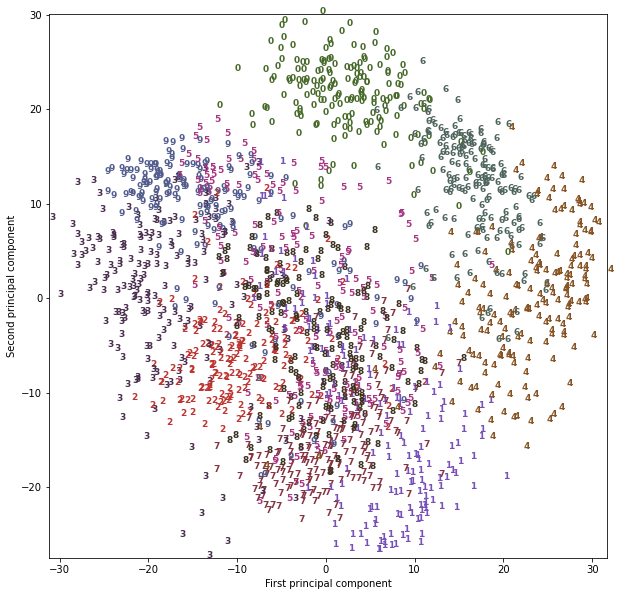

In [47]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

중첩된 부분이 많다.

이번엔 t-SNE를 적용해서 결과를 비교하자. 새 데이터를 변환하는 기능은 없으므로 transform 메서드가 없지만 모델을 만들자마자 데이터를 변환해주는 fit_transform 메서드는 존재한다.

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# t-SNE에는 transform이 없으므로 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

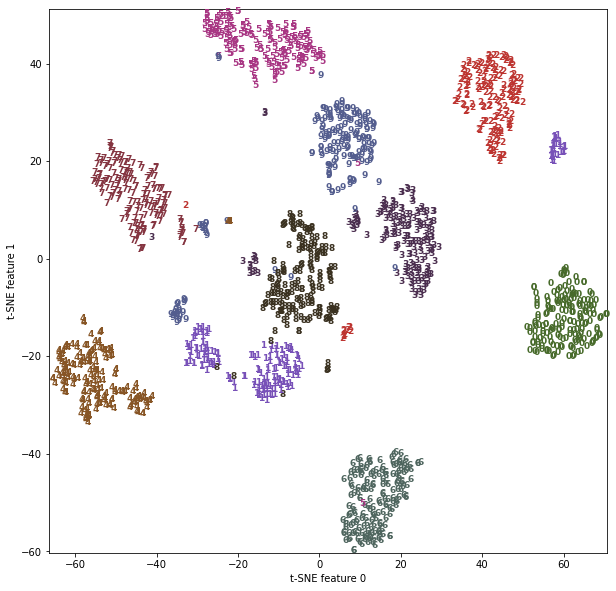

In [49]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

정말 기가 막히다. 이 알고리즘은 클래스 레이블을 사용하지 않았으므로 완전한 비지도 학습이다. perplexity, early_exaggeration을 변경해볼 수 있지만 보통 효과는 크지 않다.

## 3.5 군집
**앞서 소개한 대로 군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업이다. 분류 알고리즘과 비슷하게 각 데이터 포인트가 어느 클러스터에 속하는지 할당 또는 예측을 한다.**

### 3.5.1 k-평균 군집

데이터의 어떤 영역을 대표하는 클러스터 중심을 찾으며 두 단계를 반복한다.

1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당. 
2. 다음 클러스터에 항당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
위 과정 속 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료.

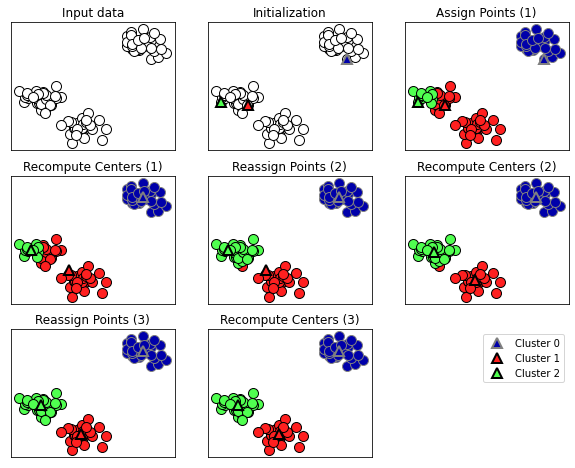

In [50]:
mglearn.plots.plot_kmeans_algorithm()

3번을 반복한 뒤 클러스터 중심에 할당되는 포인트에 변화가 없으므로 종료 된 것이다.

다음은 클러스터 중심의 경계이다.

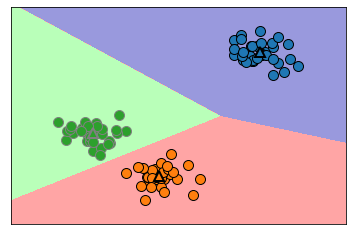

In [51]:
mglearn.plots.plot_kmeans_boundaries()

인위적인 데이터 셋에 적용해 볼건데 KMeans 객체를 생성하고 찾고자 하는 클러스터의 수를 지정한다. 그 다음 fit 메서드 호출

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

레이블을 확인할 수 있으며 predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있다. 하지만 기존 모델을 변경하는 것이 아니기에 'labels_' 결과와 같다.

In [53]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [54]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


군집은 분류와 비슷하게 보이지만 레이블 자체에 어떤 의미가 없고 정답도 모른다. 그저 같은 클러스터 끼리는 비슷하다는 것만 알 수 있다.

아래는 'cluster_centers_' 속성에 저장된 클러스터 중심을 삼각형으로 표시해 다시 그린 것이다.

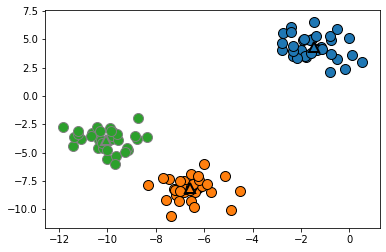

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

아래는 클러스터 수를 늘리거나 줄인 것이다.

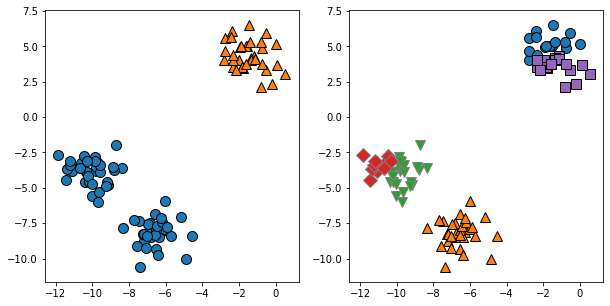

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### k-평균 알고리즘이 실패하는 경우

k-평균 알고리즘은 각 클래스는 중심이 1개 뿐이어서 클러스터는 둥근 형태로 나타난다는 점, 클러스터 반경이 똑같다고 가정하는 점들 때문에 아래와 같은 결과가 나오기도 한다.

Text(0, 0.5, 'Feature 1')

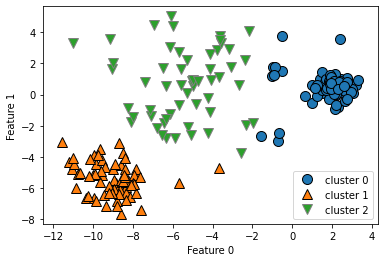

In [58]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

대충 봐도 클러스터 2는 멀리 있는 포인트 조차 같은 클러스터로 포함했다. 

또한 k-평균은 클러스터에서 모든 방향이 똑같이 중요하다고 생각한다. 가장 가까운 클러스터 중심까지의 거리만 고려하기 때문에 아래와 같이 잘 분류하지 못한다.

Text(0, 0.5, 'Feature 1')

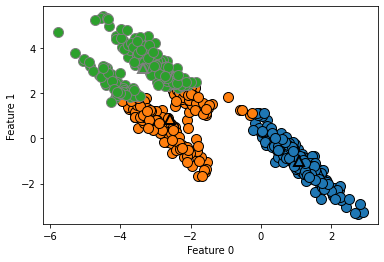

In [59]:
# 임의의 클러스터 데이터 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심 나타내기
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

two_moons 데이터처럼 더 복잡한 형태라면 더욱 성능이 나빠진다.

Text(0, 0.5, 'Feature 1')

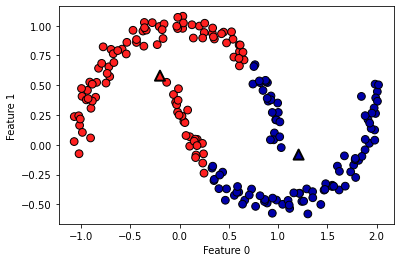

In [60]:
# 데이터셋 생성
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeanse 알고리즘 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

두 개의 반달 모양을 구분하면 좋겠지만 힘들다는 것을 알 수 있다.

### 벡터 양자화 또는 분해 메서드로서의 k-평균

k-평균은 하나의 성분으로 표현된다고 볼 수 있는데 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 '벡터 양자화'라고 부른다.

아래서 PCA, NMF, k-평균에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성한 것을 나란히 비교하겠다.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/Users/eungibae/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

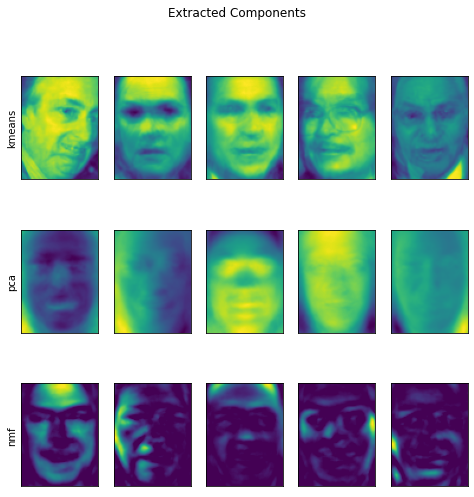

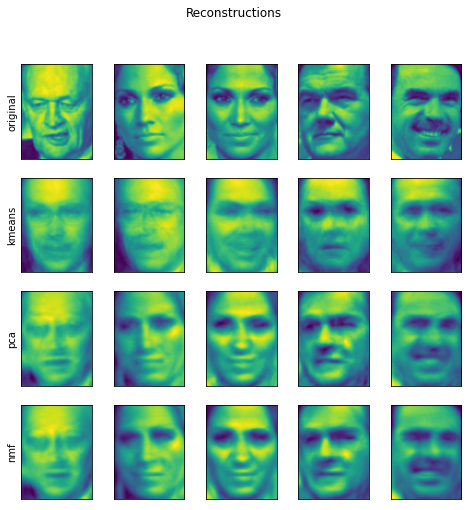

In [62]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

k-평균을 사용한 벡터 양자화의 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다는 점이다. 게다가 PCA, NMF는 2차원 데이터에서는 할 수 있는 것이 많지 않은데 k-평균은 비교적 더 많다.

아래는 복잡한 형태의 데이터셋을 다루기 위해 많은 클러스터를 사용한 k-평균이다.

Cluster memberships:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


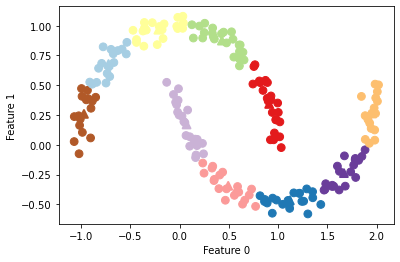

In [63]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

원래는 불가능 했던게 10개의 특성을 사용하니 가능했다.

클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 더욱 잘 나타낼 수 있다. Kmeans 모델의 transform 메서드를 사용하여 구할 수 있다.

In [65]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


### k-평균 장단점

장점: 비교적 이해, 구현이 쉽고 빠르기에 가장 인기 있는 군집 알고리즘이다. 대용량에서도 잘 작동하지만 MiniBatchKMeans도 제공한다.

단점: 무작위 초기화를 사용하기에 알고리즘의 출력이 난수 초깃값에 따라 달라진다. 또한 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이며 찾으려하는 클러스터의 개수를 지정해야 한다는 것이다.